In [1]:
!pip install pdf2image

In [2]:
!pip install easyocr

In [3]:
!pip install PyPDF2

In [4]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [5]:
# загрузка библиотек
import pandas as pd
from PIL import Image
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import cv2
import easyocr
import os
import PyPDF2
from google.colab import drive
import re

In [6]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [7]:
# подключение к гугл-диску
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# сохраниние пфд-файла
!wget -P drive/MyDrive https://www.archive-nnov.ru/?id=24998

--2023-10-14 00:03:48--  https://www.archive-nnov.ru/?id=24998
Resolving www.archive-nnov.ru (www.archive-nnov.ru)... 91.243.121.135
Connecting to www.archive-nnov.ru (www.archive-nnov.ru)|91.243.121.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3755618 (3.6M) [application/pdf]
Saving to: ‘drive/MyDrive/index.html?id=24998.2’

index.html?id=24998 100%[===================>]   3.58M  3.50MB/s    in 1.0s    

2023-10-14 00:03:50 (3.50 MB/s) - ‘drive/MyDrive/index.html?id=24998.2’ saved [3755618/3755618]



In [9]:
# создание списка страниц пдф-файла
list = []

In [10]:
# конвертация пфд-файла в формат png
images = convert_from_path("drive/MyDrive/index.html?id=24998")

for i, image in enumerate(images):
    fname = 'image'+str(i)+'.png'
    image.save(fname, "PNG")
    list.append(fname)

In [11]:
list

['image0.png',
 'image1.png',
 'image2.png',
 'image3.png',
 'image4.png',
 'image5.png',
 'image6.png',
 'image7.png',
 'image8.png',
 'image9.png',
 'image10.png',
 'image11.png',
 'image12.png',
 'image13.png',
 'image14.png']

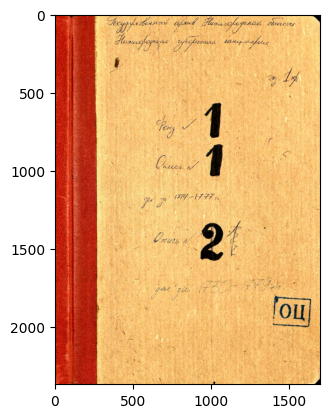

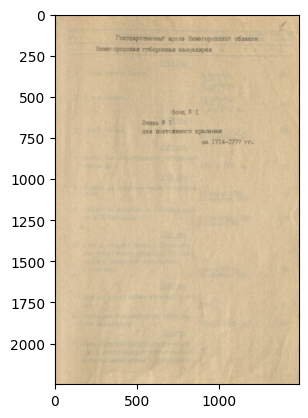

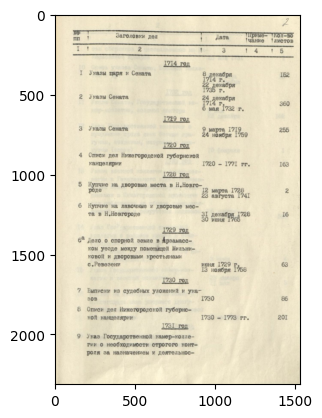

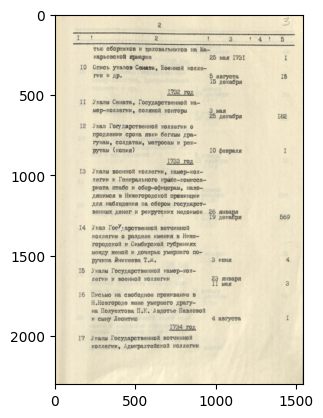

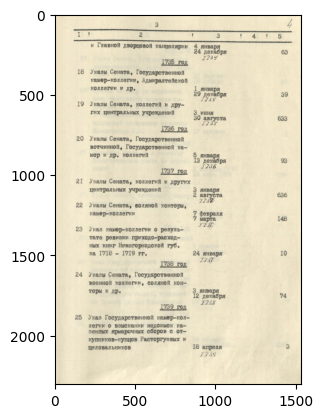

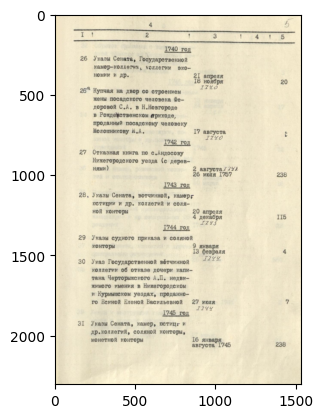

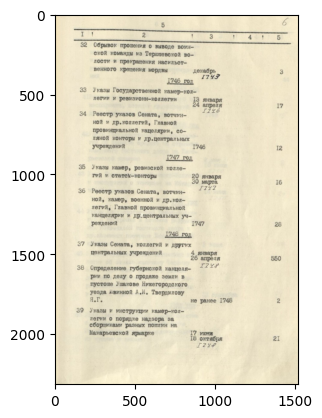

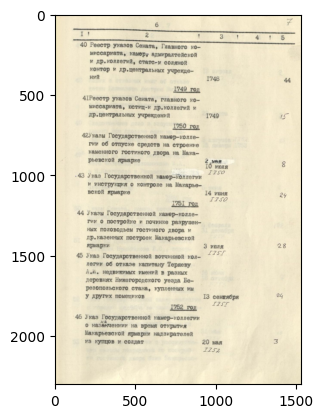

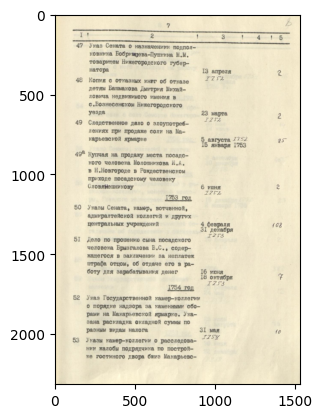

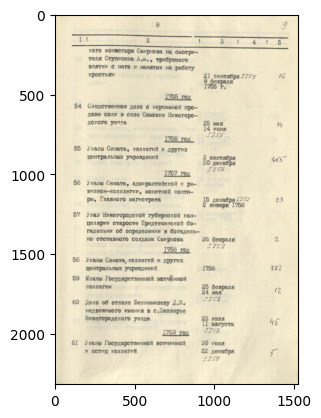

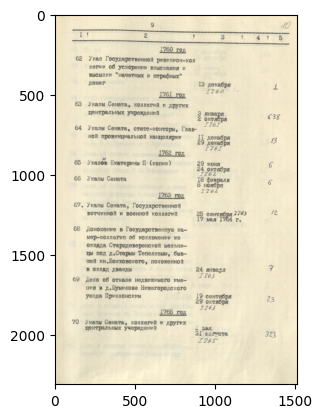

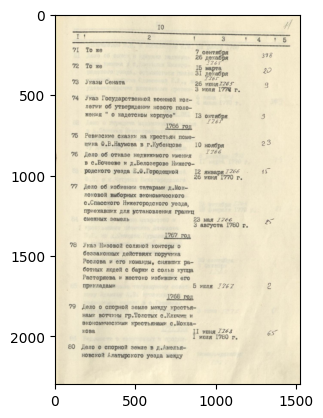

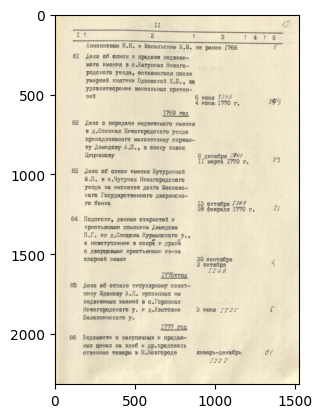

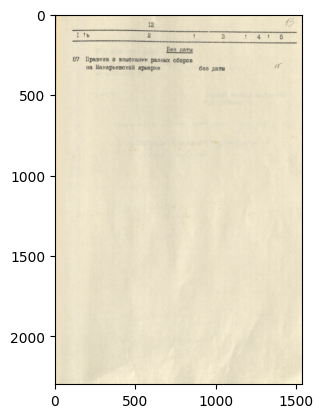

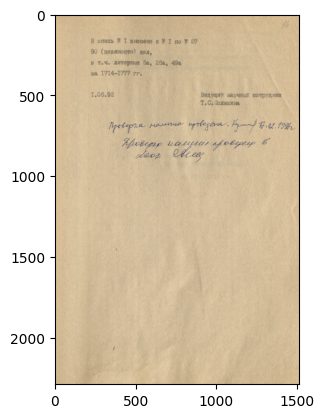

In [12]:
# просмотр полученного файла png
for x in list:
    image = Image.open(x,"r")
    plt.imshow(image)
    plt.show()

In [13]:
# функция распознавания текста для файла png
def text_recognition(file_path):
    reader = easyocr.Reader(["ru"])
    result = reader.readtext(file_path, detail = 0, paragraph = True)

    return result

In [14]:
# список с извлечённым текстом из png файлов
text = []

In [15]:
# функция для извлечения текста из файла png
def main():
  for elem in list:
    file_path = elem
    text.append(text_recognition(file_path= file_path))
    print(text_recognition(file_path= file_path))

In [16]:
if __name__ == "__main__" :
  main()

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

['схьё {ё& ?&: #7 91]/+%ьеё "[ь;с%& &хс<&ч \'(ж   ей"ж  2ч ;Аюсс 2ё+ и |&', '1}', '"к;', '11', '(чьс€', "{/4] _|777 ?'", '(ж е 7', '24 0+2 7+ ГОЦ']


['Госуцарственный архив Нилэгородской области Нижегородскея губернская канцелярия', 'Фонд К 1', 'Опись П1 дел постоянного хрененин', '38 1714 1777 ГГ.']


['Заголовки дел', 'Дата', 'Приме Тол-во чанке листов', '2', '3', '6', '1714 год', '1', 'Указы царя у Сената', '8деквбря 8 2а 27з5екабря 22 2а 24 декабря 1714 6 мая Т1732 ;', '152', '2 Указн Сената', '360', '1719 год', '3 Указы Сената', '9 карта 1729 24 ноября 1759', '255', '1720 год', 'Списи дел Нижегородской губернской канцелярии 1720 " 171 ГГа 1728 год 5 Купчие на дворовые места в Н Новго _ роде 12 марта 1728 23 августа 1741 Купчуе на лавочные 1 дворовые мес та в Н: Новгороде 31 30 декябр765728 иЮня 1729 ГОд 6а Дело 0 спорной омле В Арзамасс_ ком уеэде между помещицей Мильни_ ковой и дворовыми  крестъянами 0, Ревезени июня 1729 13 ноября {758 1730 год 5 Выписки иэ судебных уложений и ука _ з0в 1730', '163', '2', '16', '63', '86', '8 Описи дел Нижегородской губернс- кой канцелярти 1730 131 Год 9 Указ Государственной камер-колле - гии 0 необходимости строгого конт роля 98 назначенчом 7 деятельнос_', '1773 ПРа', '201']


['2', '3', '2', '3', '6', 'ТЬю сборциков и целовальников на мез карьевской   ярмарке 25 мая 1731 10 Опись указов Сзната, Боенной колле геи и др; 5 августа 15 декабря 1732 ГОД 1 Указы Сената; Государственной ка мбр-коллегии , соляной конторы 3 мая 25 декабря 12 Указ Государственной коллегии 0 продлении срока Явки беглым дра- гунам;  солдатам; матросам и реке рутам (копия) 1О Февраля 1733 ГОд 13 Указы военной коллегиу , камер-кол_ легиу и Генерального кригс-комисса- риата штабс и обер-офицерам; нахо дящимся ₽ Нижегородской  прввинци" для наблюдения за сбором государст- венных денег и рекрутских недогмок 26 19 декаоря 14 Указ Гос гарственной вотчинной коллогки 0 разделе имения в Нике- городской и Симбирской губронуях между женой и дочерью уморшего по . ручика Яникеева Т и. 3 урня 15 Указы Государственной камор-кол- легии и воонной коллегии 23 января 1 мая', '15', '182', '1', '569', '3', '16 Писъмо на свободное   проживание 5 Н Новгороде жене умерлего драгу- на Полуехтова П К: Авдотье Павл

['3', '2', '3', '65', "# Главной дворцовой канцелярии 4 января 24 декабря 773 4 1735 ГОЕ 18 Указы Сената, Государственной камер-коллегик; Адмиралтейской коллегни идр; 1 января 29 декабря 4735 19 Указы Сената, коллегий и дру_ гих центральных учреждений 3 июня 30 августа 2735 136 год 20 Указы Сената; Государственной вотчинной, Госудерственной ка мор и др: коллегий 5 января 13 декабря 4236 1737 лод 21 Указы Сената, коллег Й к других центральных учреждений 3 января августа 2737 22 Указы Сената; сОляной   конторы, каморколлегии 7 Февраля 7 марта 7737' 23 Утаа камор-коллегии 0 резулъ- тате ровизим приходо-расход_ Ных кнРГ Нижегорнодской Губ . за 1718 1719 РГа 24 января 2737 1738 год 24 Указы Сената; Государствонной военной коллегии, сОляной кон торы е др: 3 января 12 декабря 273& 1739 год 25 Указ Государственной камер-кол- легуй 0 взыскании  недо?мок ка зенных ярмарочных сборов с От _ куппиков-купцов Расторгуевых и целовальников 16 апреля 2239", '63', '39', '633', '93', '636', '148', '10', '

['4', '1', '2', '3', '4 1 5', '1740 год 26 Указн Сената, Государственной камер-коллети; 4оллегиИ ЭкО _ номии 4 др: 21 апреля 18 ноября 4 7<0 26 Купчая на двор со строением жены посадского человека %е- доровой С.А. 8 Н Новгороде в РождеКственском ариходе, проданный   посадскому человеку Молошникову И.А. 17 августа 1740 1742 год 27 Отказная книга по с Андосову Нижегородского уезда (с дерев- нями ) 2 августа1 7ч5 26 июля 1757', '20', '238', '1743 год 28 Указы Сената; вотчинной, камор; Юстиции и др: коллелий и соля- нОЙ конторы 20 апреля 4 декабря 22%3 1744 год 29 Указы судного приказа и соляной конторы 9 января 13 февраля Ё244 30 Указ Государственной вбтчинной коллегии 06 отказе дочери капи тана Черторыжского А.П: недви _ ЖИМОгО имония В Нижегородском и Курмышском уездах; проданно- Го Есиной Еленой Васильевной 27 иля 1244 1745 ГОД З1 Указы Сената, камер, юстиц: и др коллегий, соляной конторы , монетной конторы 16 января августа 1745', '15', '7', '238']


['5', '2', '3', '4', '6', '32 Обрывок прошения 0 выводе воун ~ ской команды 7а Терюшевской во- лости и прекращения несильст_ венного крещения мордвы декабрь [7 43 1746 ГОД 33 Указы Государственной камер-кол- легии у ревизуонн-коллегии 13 января 24 апреля 1246 34 Реестр указов Сената , вотчун  ной и др: коллегий, Главной провинциальной   кацелярии , со_ ляной конторы  др централъных учрекдений 1746 1747 год 35 Указы камор; ревизской колле Гий 7 статск-конторы 20 января 30 марта 36 4747 Реестр указов Сената, вотчин _ ной, камор; военной и дракол- легий; Главной провинциалъной канцелярии и др центральных уч- реждений 1747 1748 гоц 37 Указы Сената; коллегий у другух центральных учреждений 4 января 26 апреля 38 17 Цф Определение   губернской канцеля _ рии по делу 0 продаже земл? 8 пустоше Ушакове Нижегородского уеэдв #винной А.И. Твердилову Я:Г; не ранее 1746 39 Указн е инструкции   камор-кол- легии 0 порядке надзора 38 сборщиками разных пошлин на Макарьевской ярмарке 17 иючя 18 октногя 52 

['1', '2', '3', '5', '40 Реестр указов Сената; Главного ко муссариата , камор5 адмиралтейской и др  коллегий , статс-и соляной контор у др централъных учретде- ний 1748 1749 год 41Реестр указов Сената , главного к0 - муссарната; юстиц-и др коллегий 7 др центральных учрендений 1749 1750 ГОД 42Указн Государственной камор-колле- гки об отпуске средств на строенке каменного гостиного двора на Мака_ рьевской   ярмарке 2 м9я 10 уюля 2750 43 Указ Государственной кемер-коллегиу и инструкция 0 контроле на Макарье - вской   ярмарке 14 июня 1750 175[ ГОд 44 Указн Госудерственной камер-колле- Гиу 0 постройке 1 починке разрушен_ ных половодьем гостуного двора И др казенных построек Макарьевской ярмарку 3 ИЮЛя 45 Указ 75 _ Государственной вотчинной кол легуи 06 отказа   калитану Теряеву 4,4 недвицимых УМеНИЙ в разных деревнях Нижегородского уезда Бе- резополъского стана, купленных им У других помещиков 1З сентября -25; 1752 лод 46 Указ Государственной камор коллегиу %а 0 назенченииу на время открыту

['1', '2', '3', '4 1 5', '47 Указ Сената 0 назначенкуй подлол ~ ковнука Бобри !ева-Лушкина М.М: товарищем Нужегородского губер- нетора 1З апреля 48 Копия с отказных 27 г2 кнгг 0б отказе детям Башмакова Дмутрия Михай- ловича   недвухимого нмения 8 с  Вознесенском Нижегородского уезда 23 марта 49 =752 Следственное дело 0 злоупотреб _ ленуях пру продаже соли на Ма_ карьевской  ярмарке 5 августа 7752 15 января 1753 49а Кучая на продаху места посалсе кого человска Молошникова И.А . 9 Н Новгороде 5 Рождественском приходе  посадскому человеку ОловяНэшникову 6 7оня 7752 1753 ГОД 50 Указы Сената, камер,   вотченной, адмиралтейской коллегй И других центральных учрещдений 4 февраля 31 декабря 293 51 Дело по прошению сына посадского человска Брызгалова В.С., содер - жашегося в заключений да неплатеж штрафа ОтцОм; 06 отдаче его 5 ра_ боту для зарабатывания денег 16 июня 18 сктября 22Г3 1754 гОд 52 Указ Государственной камер-коллегии 0 пОрядке надзора 3а каменными сбо_ рами на Макаръевской ярмарке .

['1', '2', '3', '4', '5', 'кого монвстыря Смирнова на смотри _ теля Ступишина Аа требушцего ваятке с него 7 нанятых на работу крестьян 21 сентября 175 ц 9 Февраля 1755 Га 1755 год 54 Следственное дело 0 корчемной про дахе соди В селе Сомовке Нижегоро- дского уезпа 25 мая 14 уююня 2753- 1756 год 55 Ухазы Сената, коллегтй и других центральных учреждений 3 сентября 30 декабря 5756 [757 год 56 Указы Сената; адмиралтейской И ре- визион-колллегки , монетной конто= Ры , Главного магистрата 15 декабря-757 2 января 1758 57 Укаа Никогородской губернской кан целяруи старосте Предтеченской б0 гадельни об определении в богадель- ню отставного солдата Смирнова 26 февраля 2757 1758 год 58 Указы Сената, ксллегий и других центральных учреждений 1758 59 Кказн Государственной встчнной коллегии 25 февраля 24 ная 775% 60 Дело 06 отказе Беклемишеву Д.и: недвижтмого уменея в с Заозерье Нижегородского уезда 23 ноля 1 августа 159 гоц 2258 61 Указн Государственной вотчунной 30 ноля И Юст"ц коллегий 22 декабря =

['70 4 1 5', '1', '2', '3', '1760 год 62 Указ Государственной рэвнэион-кол легуи 06 ускорении вэыскания 1 выСЫЛКИ 5 начетных И штрафных\' денег 1З декабря 476 0 [761 гоц 63 Указн Сената, коллегий " других центральных учрекдений 3 января 2 октября =767 64 Указы Сената, статс-конторы Глав- ной провинциалъной канцелярик 11 декабря 29 декабря 1762 1762 ГОд 7 65 Указев Екатерины П копии ) 29 июня 24октября =76 2 66 Указы Сената 8 Февраля 8 нолоря 2762 1763 лод 67. Указы Сената, Государственной вотчинной И военной коллегий 25 сентября 1763 17 мая 1764 Га 68 Доношение в Государственную ка мер-коллоги? 0б усключениу из окляда Стародеверенской мелъни ы под д. Старым Тепелевым быв_ ШеЙ кН9 Болховского , положенной в оклад двахды 24 янван я 2 263 69 Дело 06 откаае недвижимого име ния ₽ Да Шумилове Нижегородского уезда Приклонским 19 сентября 29 октября 1763 1765 ГОД 70 Указы Сената: коллегий и другух центральных учеркденкй #ас 5[ еъгста 1765', '6 38', '13', '6', '72', '23', '323']


['10', '2', '3', '4', '5', '71 То же', '7 сентября 26 дегзбря 476 г 15 марта 31 Дебабря 26 июня -76 5 3 кюля 1777 Га', '39 8', '72 То же', '29', '73 Укаэн Сената', '9', '74 Указ Госудерственной военной кол легин 06 утверждении нового поло> женя 0 кадетском корпусе 13 октября 426л 1766 год 75 Ревизские скаэк; на крестъян поне шука @.В Наумова 8 г Кубенцове 10 ноября 76 276 6 Дело 0б отказе недвикимого ~мения в с Бочееве и д Белозерове Нижего- ролского уезда Е.& . Городецкой 12 января 1766 26 ионя 1770 Г, Дело об избиении татарами Д Мок- локовой выборных экономического с.Спасского Нижегородского уезда; приехавших для установления границ смежных земель 23 мая 277€ 3 августа 1780 5а 1767 год 78 Указ Низовой соляной конторы 0 беззаконных действяях поручика Рослова м его команды, снявшух ра_ ботных людей с барки с солъю купца Растеряева У жестоко избувших его прикладами 5 июлЯ 7767', '3', '25', '2', '1768 год', '79 Дело 0 спорной земле мехду крсстъя  нам вОтчзны гр Толстых € Ключищ и кономич

['1', '72', '1', '2', '3', '4 1 5', 'Анненковым Н:Н: У Мосалъским И.М: не ранее 1768 81 Дело об описи и продаже недвижи_ мОго умения в с Катунках Нижего- родского уезда; оставшегося после умершей княгини Одоевской Е Б , в0 удовлетворение вексельных претен - ЗИй 6 июня 1262 4 уюня 1770 Га 1769 год 82 Дело 0 передаче недвижимого умения в д Осинках Нижегородского уезда принадлехащего малолетнему серкан- ту Демидову А П: 8 опеку княЭю Цицуанову 8_декабря 7769 11 марта 1770 2а 83 Дело 06 описи имения Бутурлиной Ф .П: в 0, Чугунах Нижегородского уеэда за неплатеж долга Московс_ кого Государственного дворянско- Го банка 13 октября 1769 1Э февраля 1770 Га 84 Подписки , данные старостой и крестьянами помещика Демидова П Г. из д Синцова Курмышского У. и 0 невступлении в ссорк 7 драке с дворцовыми   крестьянами 7Зэ8 спорной земЛи 30 сентября 3 октября 17 6 9 177бтгод 85 Дело 0б отказе титулярному совете нику Жданову А.Е: купленных иМ недвижимых  имений 8 с. Горюшках Нижегородского У: у д Хватовке

['12', '12', "1 'ъ", '2', '3', "4 ' 5", 'Без_латн 87 Правила 0 вэыскании  разных сборов на Макарьевской  ярмарке без двты', '75']


['В опись 2 1 внесоно СЛ1 По 987', '90 (девяносто) дел; 5 "а Ч6 литорнна 65 ₽ 2ба , 49а 52 1714-1777 Бг.', '1.06.92', 'Ведущий научный   сотрудния Т:С: Полихина', "Т-р_&  1ччыъчхо   '(е_е& , 4#   1%ъ Яобе 49 €4420 ₽ 77еВерсе 6 (с ( уе"]


In [17]:
text

[['схьё {ё& ?&: #7 91]/+%ьеё "[ь;с%& &хс<&ч \'(ж   ей"ж  2ч ;Аюсс 2ё+ и |&',
  '1}',
  '"к;',
  '11',
  '(чьс€',
  "{/4] _|777 ?'",
  '(ж е 7',
  '24 0+2 7+ ГОЦ'],
 ['Госуцарственный архив Нилэгородской области Нижегородскея губернская канцелярия',
  'Фонд К 1',
  'Опись П1 дел постоянного хрененин',
  '38 1714 1777 ГГ.'],
 ['Заголовки дел',
  'Дата',
  'Приме Тол-во чанке листов',
  '2',
  '3',
  '6',
  '1714 год',
  '1',
  'Указы царя у Сената',
  '8деквбря 8 2а 27з5екабря 22 2а 24 декабря 1714 6 мая Т1732 ;',
  '152',
  '2 Указн Сената',
  '360',
  '1719 год',
  '3 Указы Сената',
  '9 карта 1729 24 ноября 1759',
  '255',
  '1720 год',
  'Списи дел Нижегородской губернской канцелярии 1720 " 171 ГГа 1728 год 5 Купчие на дворовые места в Н Новго _ роде 12 марта 1728 23 августа 1741 Купчуе на лавочные 1 дворовые мес та в Н: Новгороде 31 30 декябр765728 иЮня 1729 ГОд 6а Дело 0 спорной омле В Арзамасс_ ком уеэде между помещицей Мильни_ ковой и дворовыми  крестъянами 0, Ревезени июня 1729 

In [18]:
# создадим датафрейм для номеров страниц и извлечённого текста
data = pd.DataFrame({'page_num': range(1,len(list)+1), 'text_on_page': text})

In [19]:
# сохраним data в файл csv для удобства в дальнейшей работе в google colab
data.to_csv('test_2.csv')
!cp test_2.csv "drive/My Drive/"

In [20]:
data2 = pd.read_csv('drive/My Drive/test_2.csv')

In [21]:
data2 = data2.drop(['Unnamed: 0'], axis = 1)

In [22]:
data2

,page_num,text_on_page
0,1,"['схьё {ё& ?&: #7 91]/+%ьеё ""[ь;с%& &хс<&ч \'(ж ей""ж 2ч ;Аюсс 2ё+ и |&', '1}', '""к;', '11', '(чьс€', ""{/4] _|777 ?'"", '(ж е 7', '24 0+2 7+ ГОЦ']"
1,2,"['Госуцарственный архив Нилэгородской области Нижегородскея губернская канцелярия', 'Фонд К 1', 'Опись П1 дел постоянного хрененин', '38 1714 1777 ГГ.']"
2,3,"['Заголовки дел', 'Дата', 'Приме Тол-во чанке листов', '2', '3', '6', '1714 год', '1', 'Указы царя у Сената', '8деквбря 8 2а 27з5екабря 22 2а 24 декабря 1714 6 мая Т1732 ;', '152', '2 Указн Сената', '360', '1719 год', '3 Указы Сената', '9 карта 1729 24 ноября 1759', '255', '1720 год', 'Списи дел Нижегородской губернской канцелярии 1720 "" 171 ГГа 1728 год 5 Купчие на дворовые места в Н Новго _ роде 12 марта 1728 23 августа 1741 Купчуе на лавочные 1 дворовые мес та в Н: Новгороде 31 30 декябр765728 иЮня 1729 ГОд 6а Дело 0 спорной омле В Арзамасс_ ком уеэде между помещицей Мильни_ ковой и дворовыми крестъянами 0, Ревезени июня 1729 13 ноября {758 1730 год 5 Выписки иэ судебных уложений и ука _ з0в 1730', '163', '2', '16', '63', '86', '8 Описи дел Нижегородской губернс- кой канцелярти 1730 131 Год 9 Указ Государственной камер-колле - гии 0 необходимости строгого конт роля 98 назначенчом 7 деятельнос_', '1773 ПРа', '201']"
3,4,"['2', '3', '2', '3', '6', 'ТЬю сборциков и целовальников на мез карьевской ярмарке 25 мая 1731 10 Опись указов Сзната, Боенной колле геи и др; 5 августа 15 декабря 1732 ГОД 1 Указы Сената; Государственной ка мбр-коллегии , соляной конторы 3 мая 25 декабря 12 Указ Государственной коллегии 0 продлении срока Явки беглым дра- гунам; солдатам; матросам и реке рутам (копия) 1О Февраля 1733 ГОд 13 Указы военной коллегиу , камер-кол_ легиу и Генерального кригс-комисса- риата штабс и обер-офицерам; нахо дящимся ₽ Нижегородской прввинци"" для наблюдения за сбором государст- венных денег и рекрутских недогмок 26 19 декаоря 14 Указ Гос гарственной вотчинной коллогки 0 разделе имения в Нике- городской и Симбирской губронуях между женой и дочерью уморшего по . ручика Яникеева Т и. 3 урня 15 Указы Государственной камор-кол- легии и воонной коллегии 23 января 1 мая', '15', '182', '1', '569', '3', '16 Писъмо на свободное проживание 5 Н Новгороде жене умерлего драгу- на Полуехтова П К: Авдотье Павловой и сыну Леонтию 4 августа 1734 год 17 Указн Государственной вотчинной коллегин, Адмиралтейской коллегуй']"
4,5,"['3', '2', '3', '65', ""# Главной дворцовой канцелярии 4 января 24 декабря 773 4 1735 ГОЕ 18 Указы Сената, Государственной камер-коллегик; Адмиралтейской коллегни идр; 1 января 29 декабря 4735 19 Указы Сената, коллегий и дру_ гих центральных учреждений 3 июня 30 августа 2735 136 год 20 Указы Сената; Государственной вотчинной, Госудерственной ка мор и др: коллегий 5 января 13 декабря 4236 1737 лод 21 Указы Сената, коллег Й к других центральных учреждений 3 января августа 2737 22 Указы Сената; сОляной конторы, каморколлегии 7 Февраля 7 марта 7737' 23 Утаа камор-коллегии 0 резулъ- тате ровизим приходо-расход_ Ных кнРГ Нижегорнодской Губ . за 1718 1719 РГа 24 января 2737 1738 год 24 Указы Сената; Государствонной военной коллегии, сОляной кон торы е др: 3 января 12 декабря 273& 1739 год 25 Указ Государственной камер-кол- легуй 0 взыскании недо?мок ка зенных ярмарочных сборов с От _ куппиков-купцов Расторгуевых и целовальников 16 апреля 2239"", '63', '39', '633', '93', '636', '148', '10', '74', '3']"
5,6,"['4', '1', '2', '3', '4 1 5', '1740 год 26 Указн Сената, Государственной камер-коллети; 4оллегиИ ЭкО _ номии 4 др: 21 апреля 18 ноября 4 7<0 26 Купчая на двор со строением жены посадского человека %е- доровой С.А. 8 Н Новгороде в РождеКственском ариходе, проданный посадскому человеку Молошникову И.А. 17 августа 1740 1742 год 27 Отказная книга по с Андосову Нижегородского уезда (с дерев- нями ) 2 августа1 7ч5 26 июля 1757', '20', '238', '1743 год 28 Указы Сената; вотчинной, камор; Юстиции и др: коллелий и соля- нОЙ конторы 20 апреля 4 декабря 22%3 1744 год 29 Указы судного приказа и соля

In [23]:
# функция для поиска заданного слова в извлечённом тексте
def find_substr():
  word = input("Введите слово для поиска:")
  substring = r'{word}'.format(word = word)
  find_w = data2[data2.text_on_page.str.contains(word)]
  for page_num, text_on_page in zip(find_w.page_num, find_w.text_on_page):
    print(f'Искомое слово "{word}" содержится на страницах:', page_num, 'в количестве:', len(re.findall(substring, text_on_page)))

In [24]:
if __name__ == "__main__" :
  find_substr()

Введите слово для поиска:Нижег
Искомое слово "Нижег" содержится на страницах: 2 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 3 в количестве: 2
Искомое слово "Нижег" содержится на страницах: 4 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 5 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 6 в количестве: 2
Искомое слово "Нижег" содержится на страницах: 7 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 8 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 9 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 10 в количестве: 2
Искомое слово "Нижег" содержится на страницах: 11 в количестве: 1
Искомое слово "Нижег" содержится на страницах: 12 в количестве: 2
Искомое слово "Нижег" содержится на страницах: 13 в количестве: 4
